In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("chat_dataset.csv")
df

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative
2,I'm not sure how I feel about this,neutral
3,The service was excellent,positive
4,I had a bad experience,negative
...,...,...
579,I have to cancel my vacation plans because I c...,negative
580,My computer crashed and I lost all my importan...,negative
581,I got into a car accident and my car is totale...,negative
582,I have a cold and can't stop coughing. it's re...,negative


In [7]:
df.info

<bound method DataFrame.info of                                                message sentiment
0                           I really enjoyed the movie  positive
1                                The food was terrible  negative
2                   I'm not sure how I feel about this   neutral
3                            The service was excellent  positive
4                               I had a bad experience  negative
..                                                 ...       ...
579  I have to cancel my vacation plans because I c...  negative
580  My computer crashed and I lost all my importan...  negative
581  I got into a car accident and my car is totale...  negative
582  I have a cold and can't stop coughing. it's re...  negative
583  I just found out my ex is dating someone new. ...  negative

[584 rows x 2 columns]>

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import LeakyReLU

In [10]:
texts = df['message'].values
labels = df['sentiment'].values
l = LabelEncoder()
labels =l.fit_transform(labels)
labels = to_categorical(labels)

In [11]:
t = ""
for i in texts:
    t+=i
t = t.split(" ")
vocab_size = len(set(t))
embedding_dim = 65

In [14]:
from keras.layers import Reshape
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=105),
    LSTM(64),
    Dense(1, activation=LeakyReLU()),
    Dense(6, activation=LeakyReLU()),
    Dense(3, activation='softmax')
])

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 105, 65)           65715     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33280     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
 dense_4 (Dense)             (None, 6)                 12        
                                                                 
 dense_5 (Dense)             (None, 3)                 21        
                                                                 
Total params: 99093 (387.08 KB)
Trainable params: 99093 (387.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences)

X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=105)
X_test_padded = pad_sequences(X_test_sequences, maxlen=105)
print(y_test)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0.

In [25]:
model.fit(X_train_padded, y_train, epochs=100)

In [18]:
y_pred = model.predict(X_test_padded)

4/4 [==============================] - 1s 13ms/step


In [19]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(117,)

In [20]:
y_pred

array([1, 2, 0, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1,
       2, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2,
       1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1,
       1, 1, 2, 0, 0, 1, 1], dtype=int64)

In [21]:
y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8290598290598291


In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.88      0.91      0.89        54
           2       0.84      0.82      0.83        33

    accuracy                           0.83       117
   macro avg       0.81      0.81      0.81       117
weighted avg       0.83      0.83      0.83       117



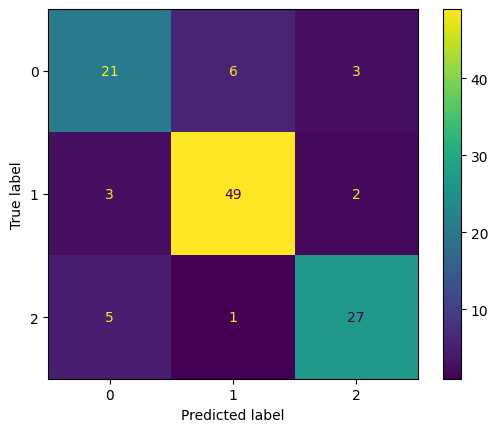

In [24]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()